# Regression - Predict 

# <center>Definition</center>

## Predict Overview

Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to 320%; while in Europe, it only accounts for up to 90% of the manufacturing cost.
Delivery time prediction has long been a part of city logistics, but refining accuracy has recently become very important for services such as Sendy, Mr delivery and Uber Eats which deliver goods on-demand.

These services and similar ones must receive an order and have it delivered within the shortest time to appease their users. In these situations +/- 20  minutes can make a big difference so it’s very important for customer satisfaction that the initial prediction is highly accurate and that any delays are communicated effectively,which will ultimately improve customer experience. In addition, the solution will enable service providers to realise cost savings, and ultimately reduce the cost of doing business, through improved resource management and planning for order scheduling.
This project was hosted by https://www.sendyit.com/  in partnership with insight2impact facility.

<img src="https://raw.githubusercontent.com/rufusseopa/Team_18_JHB_WhatTheHack_regression-predict-api-template/master/meme.png" width="300" height="300" align="center"/>

## Problem Statement 

The goal is to build a general model which will take data about a good delivery order as input and then output the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final destination. 

##  Performance Metrics

There are various metrics which we can use to evaluate the performance of ML algorithms, classification as well as regression algorithms. We must carefully choose the metrics for evaluating ML model performance because they will be used to judge our model’s effectiveness.

We would now like to test our model using the testing data. To achieve this, we'll use the Root Mean Square Error:
$$
MRSE = \sqrt{\frac{1}{N}\sum_{i=1}^N (p_i - y_i)^2} 
$$
where $p_i$ refers to the $i^{\rm th}$ prediction made from `X_test`, $y_i$ refers to the $i^{\rm th}$ value in `y_test`, and $N$ is the length of `y_test`.

and we will also be using the R Squared metric, which is generally used for explanatory purpose and provides an indication of the goodness or fit of a set of predicted output $\hat{y}_i$ values to the actual output  $y_i$  values.




 # <center>Exploratory Data Analysis</center>

## Data Exploration 

### Modules Imports 

In [133]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import datetime
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
#To get away with warnings for presentability 
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm, skew 
# Modelling
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler # For normalization

# Figures inline and set visualization style
%matplotlib inline
sns.set()


### Data Loading

In [134]:
train_df=pd.read_csv('https://raw.githubusercontent.com/rufusseopa/Team_18_JHB_WhatTheHack_regression-predict-api-template/master/Data/Train.csv')
test_df=pd.read_csv('https://raw.githubusercontent.com/rufusseopa/Team_18_JHB_WhatTheHack_regression-predict-api-template/master/Data/Test.csv')
riders_df=pd.read_csv('https://raw.githubusercontent.com/rufusseopa/Team_18_JHB_WhatTheHack_regression-predict-api-template/master/Data/Riders.csv')
variable_df=pd.read_csv('https://raw.githubusercontent.com/rufusseopa/Team_18_JHB_WhatTheHack_regression-predict-api-template/master/Data/VariableDefinitions.csv')

In [135]:
train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [136]:
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [137]:
riders_df.nunique()

Rider Id          960
No_Of_Orders      811
Age               725
Average_Rating     45
No_of_Ratings     553
dtype: int64

In [138]:
variable_df.head()

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31


The `train_df`,`test_df`, and `riders_df`  dataset have the following fields together with their datatypes:

**Features Description**

* Order No – Unique number identifying the order (object)
* User Id – Unique number identifying the customer on a platform (object)
* Vehicle Type – For this competition limited to bikes, however in practice, Sendy service extends to trucks and vans (object)
* Platform Type – Platform used to place the order, there are 4 types (int64)
* Personal or Business – Customer type (object)

<u> Placement times </u> 

* Placement - Day of Month i.e 1-31 (int64)
* Placement - Weekday (Monday = 1) (int64)
* Placement - Time - Time of day the order was placed (object)

<u>Confirmation times</u> 

* Confirmation - Day of Month i.e 1-31 (int64)
* Confirmation - Weekday (Monday = 1) (int64)
* Confirmation - Time - time of day the order was confirmed by a rider (object)


<u>Arrival at Pickup times</u> 
* Arrival at Pickup - Day of Month i.e 1-31 (int64)
* Arrival at Pickup - Weekday (Monday = 1) (int64)
* Arrival at Pickup - Time - Time of day the rider arrived at the location to pick up the order - as marked by the rider through the Sendy application (object)


<u>Pickup times</u> 

* Pickup - Day of Month i.e 1-31 (int64)
* Pickup - Weekday (Monday = 1) (int64)
* Pickup - Time - Time of day the rider picked up the order - as marked by the rider through the Sendy application (object)

<u> Arrival at Destination times</u> 

* Arrival at Delivery - Day of Month i.e 1-31  (int64)
* Arrival at Delivery - Weekday (Monday = 1) (int64)
* Arrival at Delivery - Time - Time of day the rider arrived at the destination to deliver the order - as marked by the rider through the Sendy application (object)

<u> Location</u> 

* Distance covered (KM) - The distance from Pickup to Destination (int64)
* Pickup Latitude and Longitude - Latitude and longitude of pick up location (int64)
* Destination Latitude and Longitude - Latitude and longitude of delivery location (int64)

<u> Weather </u>

* Temperature -Temperature at the time of order placement in Degrees Celsius (measured every three hours) (int64)
* Precipitation in Millimeters - Precipitation at the time of order placement (measured every three hours) (int64)


<u> Rider metrics </u>

* Rider ID – Unique number identifying the rider (same as in order details) (object)
* No of Orders – Number of Orders the rider has delivered  (int64)
* Age – Number of days since the rider delivered the first order (int64)
* Average Rating – Average rating of the rider (float64)
* No of Ratings - Number of ratings the rider has received. Rating an order is optional for the customer. (int64)

**Response Variable**
* Time from Pickup to Arrival - Time in seconds between ‘Pickup’ and ‘Arrival at Destination’ - calculated from the columns for the purpose of facilitating the task  (int64)

The  `variable_df` has variable infomation which was used to formulate the above list of variables and their Describtion 

In [139]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [140]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

As it may be suspected based on the above fields ,some of the features may not be needed in our model,which means they must be discarded during preprocessing.

Lastly you must have noticed that the `Time from Pickup to Arrival` column is  missing in the Test set,this is because `Time from Pickup to Arrival` column is what our model that we will build  will be predicting. 

## Data Preprocessing 

### Combine Data

In [141]:
train_df = train_df.merge(riders_df, on='Rider Id')
test_df = test_df.merge(riders_df, on='Rider Id')

Make `Order Id` the index of both the `test_df` and `train_df`,we will need this column for submission

In [142]:
train_df.set_index('Order No', inplace=True) 
test_df.set_index('Order No', inplace=True) 

In [143]:
test_df.head()

,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
Order No,,,,,,,,,,,,,,,,,,,,,
Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,...,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
Order_No_2699,User_Id_592,Bike,1,Personal,26,2,2:43:21 PM,26,2,2:47:16 PM,...,NaN,-1.312745,36.875715,-1.288435,36.760677,Rider_Id_192,439,1511,13.3,171
Order_No_21486,User_Id_478,Bike,3,Business,29,5,11:55:05 AM,29,5,11:58:12 AM,...,NaN,-1.255189,36.782203,-1.293393,36.790237,Rider_Id_192,439,1511,13.3,171
Order_No_19336,User_Id_2801,Bike,3,Business,2,1,9:23:21 AM,2,1,9:23:44 AM,...,NaN,-1.310451,36.868724,-1.259542,36.787118,Rider_Id_192,439,1511,13.3,171
Order_No_20374,User_Id_3465,Bike,3,Business,14,4,12:55:59 PM,14,4,1:22:44 PM,...,NaN,-1.333275,36.870815,-1.255189,36.782203,Rider_Id_192,439,1511,13.3,171


In [144]:
train_df.head()

,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
Order No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,3:41:30 PM,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549
Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,5,1:12:49 PM,...,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,1637,1309,13.8,549
Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,7:12:10 AM,2,2,7:12:29 AM,...,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,2986,1637,1309,13.8,549
Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58 AM,22,2,10:42:24 AM,...,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1602,1637,1309,13.8,549


### Drop features with too many missing values

One of the first tasks in any dataset is to find if there are missing values. As this dataset has more features than we’d like, we’re going to drop features that have too many missing values. Let’s see how many missing values each feature has.

`train_df`

In [145]:
nulls = train_df.isnull().sum()
# this will show only features that have nonzero missing values
nulls[nulls!=0]

Temperature                      4366
Precipitation in millimeters    20649
dtype: int64

`test_df`

In [146]:
nulls = test_df.isnull().sum()
# this will show only features that have nonzero missing values
nulls[nulls!=0]

Temperature                     1437
Precipitation in millimeters    6869
dtype: int64

We can also visualize missing values as follows:

Text(0.5,1,'Train missing values Heatmap')

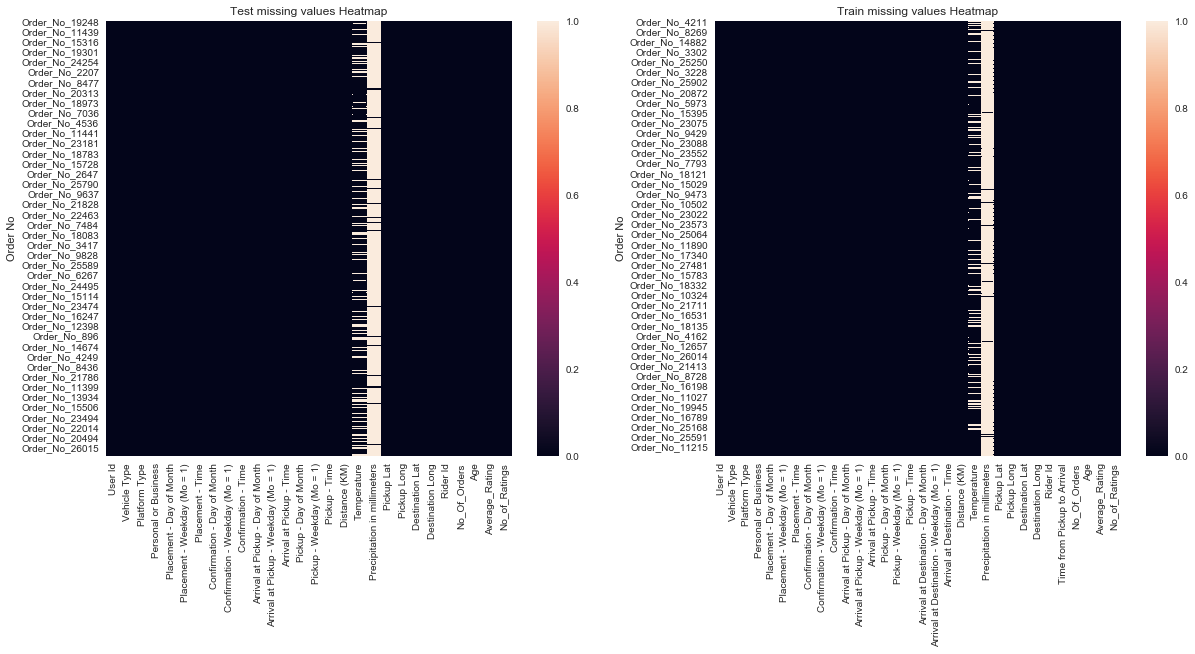

In [147]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(train_df.isna(), ax = ax[1])
sns.heatmap(test_df.isna(), ax = ax[0])
ax[0].set_title('Test missing values Heatmap')
ax[1].set_title('Train missing values Heatmap')


There seem to be two features with missing data points,viz ‘Precipitation in millimeters’ and Temperatue ! Let’s see what percentage they take up in the whole dataset.

`train_df`

In [148]:
nulls_percentage = nulls[nulls!=0]/train_df.shape[0]*100
print('the percentages of null values per feature:\n')
print(round(nulls_percentage,2))

the percentages of null values per feature:

Temperature                      6.78
Precipitation in millimeters    32.40
dtype: float64


`test_df`

In [149]:
nulls_percentage = nulls[nulls!=0]/test_df.shape[0]*100
print('the percentages of null values per feature:\n')
print(round(nulls_percentage,2))

the percentages of null values per feature:

Temperature                     20.33
Precipitation in millimeters    97.18
dtype: float64


It seems like the feature that have any missing values have a significant number of missing values. For ‘Precipitation in millimeters’, it’s missing almost more than half of the data! Hence, it is safe to eliminate entire feature if they contain any missing values. We can do this with the dropna function.

In [150]:
def dropna(input_df, threshold=70):
    drop_names = []
    for column in input_df.columns:
        col_num_null = (input_df[column].isnull().sum() / len (input_df[column]))* 100
        if col_num_null > threshold:
            drop_names.append(column)
    result_df = input_df.copy()
    ##test_df=test_df.drop(['Precipitation in millimeters'],axis=1)
    return result_df.drop(drop_names, axis=1)

We will apply the function on both `test_df` and `train_df`.

In [151]:
train_df=dropna(train_df)

In [152]:
test_df=dropna(test_df)

In [153]:
test_df.columns

Index(['User Id', 'Vehicle Type', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id', 'No_Of_Orders',
       'Age', 'Average_Rating', 'No_of_Ratings'],
      dtype='object')

In [154]:
train_df.columns

Index(['User Id', 'Vehicle Type', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'Time from Pickup to Arrival', 'No_Of_Orders', 'Age',
       'Average_Rating', 'No_of_Ratings'],
      dtype='object')

We can see that we lost the‘Precipitation in millimeters’ on both `test_df` and `train_df`,this is because the missing values where more than the accepted default threshold of $70\%$

Now for the 'Temperature' feature we can see that we have more than $50\%$ of the data available.We can then impute the values for 'Temperature' in both the `train_df` and `test_df`,but first we need to check the distribution of the 'Temperature' so that we can decide whether to impute with mean or median. 

ValueError: max must be larger than min in range parameter.

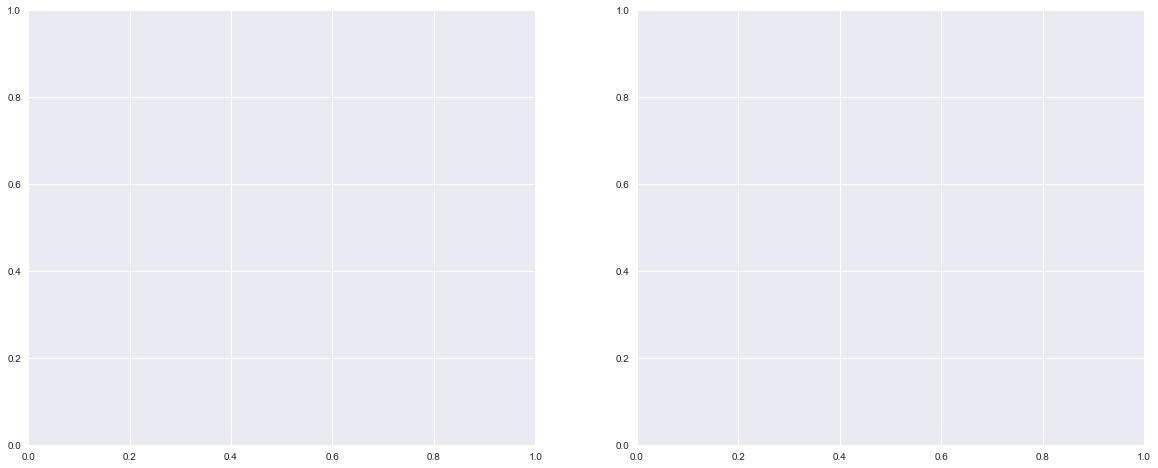

In [155]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.distplot(train_df['Temperature'], bins=30, color='blue', ax = ax[0], kde=False)
sns.distplot(test_df['Temperature'], bins=30, color='green', ax = ax[1], kde=False)
ax[0].set_title('Temperature Distribution for the train dataset')
ax[1].set_title('Temperature Distribution for the test dataset')
ax[0].axvline(x=train_df['Temperature'].mean(), color='red')
ax[0].axvline(x=train_df['Temperature'].median(), color='orange')
ax[1].axvline(x=test_df['Temperature'].mean(), color='red')
ax[1].axvline(x=test_df['Temperature'].median(), color='orange')

The Temperature feature in both `train_df` and `test_df` is normally distrubuted hence we can use either the mean or the median to impute the feature. We will choose to use the mean in this instance.

In [ ]:
train_df['Temperature']=train_df.Temperature.fillna(train_df.Temperature.mean())

In [ ]:
test_df['Temperature']=test_df.Temperature.fillna(test_df.Temperature.mean())

In [ ]:
train_df.info()

In [ ]:
test_df.info()

The temperature feature has been imputed with the mean in both the `train_df` and the `test_df`

### Rider's Features 

In [ ]:
train_df.columns

We need to look at the Riders data and see if they is any correlation between its features `Age`,`No of Orders`,`Average Rating`,`No of Ratings`

In [ ]:
sns.heatmap(train_df[['No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings']].corr(), cmap='RdBu',annot=True)

Since we can see that they is some correlation between features from `rider_df`, We can try to reduce the dimensionality of the data.
We do this by creating two more features that have meaning.This will also help us standardaze the data as we currently do not know what is the highest rating.

In [ ]:
# Calculate delivery rate 
test_df['Delivery Rate'] = test_df['No_Of_Orders']/test_df['Age']
train_df['Delivery Rate'] = train_df['No_Of_Orders']/train_df['Age']

In [ ]:
# Calculate scaled rating
test_df['Scaled Rating'] = test_df['Average_Rating']*(test_df['No_of_Ratings']/test_df['No_of_Ratings'].sum())
train_df['Scaled Rating'] = train_df['Average_Rating']*(train_df['No_of_Ratings']/train_df['No_of_Ratings'].sum())

### Time features

The time features in their object data type are pretty much useless , to combat this we will convert them from object data type to date time data type

In [ ]:
traindf_time_columns = ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time', 'Arrival at Destination - Time']
testdf_time_columns = ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time']
for cols in traindf_time_columns:
    train_df[cols] = pd.to_datetime(train_df[cols])
    
for cols in testdf_time_columns:
    test_df[cols] = pd.to_datetime(test_df[cols])

Let’s think about what is involved in good delivery. We can break it down into three principal components:
Pick-up the food from the supplier.
Drive from the supplier to the customer.
Drop-off the food to the customer.
We can predict the time taken for each component and then add these together to get the final delivery time.

**Supplier Pick-Up**

When a driver arrives at a destination, he is required to find a bikepark, pick-up the goods and make it back to the car. Let’s explore the potential complications that could occur during this process.

* No park: For pick-ups located in the city centre this can be significantly more difficult compared to those located in more residential areas. To capture this information we can use the latitude/longitude information.

* Difficult access: pick-up points will tend to be fairly easy to access since they rely on that to serve customers, but others can be in industrial areas as well as not having an obvious entrance making it more difficult. Similar to the above we can use location information while adding the category of the supplier.

* Goods not ready: As the order sizes can be quite large, it’s not uncommon for goods to be unprepared. To deal with this the supplier can be contacted on the day of the pick-up to check goods will be ready on time. The response to these messages would be a useful flag to understand our timing. Whether or not the particular supplier has a history would also be useful input. Finally, the order size is a good indicator; not much can go wrong when preparing a small package of goods but when it’s for 100 pax there’s a lot more potential for something to go wrong.


* Something missing from the order: Driver should check order on arrival and in some cases they may find something missing. This means they must wait for the extra goods to be prepared. Again, this probably depends on the supplier and how busy they are at the time of pick-up.

For this part of the problem we’ll use the following data features To calculate the time in seconds between `Placement time-Confirmation time` ,`Confirmation time-Arrival time`,`Arrival Pick up time - Pickup time`:

In [ ]:
train_df['placement_to_confirmation_time'] =  (train_df['Confirmation - Time'] - train_df['Placement - Time']).astype('timedelta64[s]')
train_df['confirmation_to_arrivalpickup_time'] = (train_df['Arrival at Pickup - Time'] - train_df['Confirmation - Time']).astype('timedelta64[s]')
train_df['arrivalpickup_to_pickup_time'] = (train_df['Pickup - Time'] - train_df['Arrival at Pickup - Time']).astype('timedelta64[s]')

test_df['placement_to_confirmation_time'] =  (test_df['Confirmation - Time'] - test_df['Placement - Time']).astype('timedelta64[s]')
test_df['confirmation_to_arrivalpickup_time'] = (test_df['Arrival at Pickup - Time'] - test_df['Confirmation - Time']).astype('timedelta64[s]')
test_df['arrivalpickup_to_pickup_time'] = (test_df['Pickup - Time'] - test_df['Arrival at Pickup - Time']).astype('timedelta64[s]')

Estimating the travel time between destinations is a tricky task for many reasons; there are thousands of routes to choose from, traffic conditions that are constantly changing, road closures and accidents; all of which provide so much unpredictability into any model we could create.
Luckily for us, this infomation has been given to us as `Time from Pickup to Arrival ` in the `train_df`.

`Delivery Time = Placement to confirmation Time + Confirmation to arrival pickup Time  + Arrival pickup to pickup Time+ Point to Point Time`

However,In this project we only intrested in the `Time from Pickup to Arrival` as a Target Variable 

We also know that different days in a month have different traffic for different reasons eg Paydays(15th ,25th).Hence we will split our `Pickup - Day of Month` into 1st week,2nd week,3rd week and lastly 4th week of the month

In [ ]:
def traffic_ofthe_month(input_df):
    input_df['week_no'] = ''
    for i in range(0, len(input_df['Pickup - Day of Month'])):
        if input_df['Pickup - Day of Month'][i] < 8:
            input_df['week_no'][i] = '1st week'
        elif 8 <= input_df['Pickup - Day of Month'][i] < 15:
            input_df['week_no'][i] = '2nd week'
        elif 15 <= input_df['Pickup - Day of Month'][i] < 23:
            input_df['week_no'][i] = '3rd week'
        elif 23 <= input_df['Pickup - Day of Month'][i] <= 31:
            input_df['week_no'][i] = '4th week'
    input_df['week_no'] = input_df['week_no'].astype('category')


In [ ]:
traffic_ofthe_month(train_df)


In [ ]:
traffic_ofthe_month(test_df)

Now that we have preserved the time features information by creating more features, we can now drop the `traindf_time_columns` and `testdf_time_columns` features .

Now we will break up the hours as well into different categories depending on the traffic during specific times of the day.

We will first convert the `Pickup Time` from an object to the hour data type.

In [ ]:
test_df['pickuphour'] = test_df['Pickup - Time'].dt.hour
train_df['pickuphour'] = train_df['Pickup - Time'].dt.hour

In [ ]:
def peakness_hour(input_df):
    input_df['hour_status'] = ''
    for i in range(0, len(input_df['pickuphour'])):
        if 6 <= input_df['pickuphour'][i] <= 9:
            input_df['hour_status'][i] = 'morning_peakhour'
            
        elif 9 < input_df['pickuphour'][i] <= 12:
            input_df['hour_status'][i] = 'morning_offpeakhour'
            
        elif 12 < input_df['pickuphour'][i] <= 15:
            input_df['hour_status'][i] = 'afternoon_offpeakhour'
            
        elif 15 < input_df['pickuphour'][i] <= 18:
            input_df['hour_status'][i] = 'afternoon_peakhour'
            
        elif 18 < input_df['pickuphour'][i] <= 21:
            input_df['hour_status'][i] = 'night_peakhour'  
            
        elif (21 < input_df['pickuphour'][i]) or (input_df['pickuphour'][i] < 7):
            input_df['hour_status'][i] = 'night_offpeakhour'
    input_df['hour_status'] = input_df['hour_status'].astype('category')

In [ ]:
peakness_hour(train_df)


In [ ]:
peakness_hour(test_df)

In [ ]:
train_df.head()

We have now used our `Pickup - Day of Month` and `Pickup Time` to create new features which do not have many categories,hence they will be very helful to our model.

### Target Feature

We will know look at how the target variable `Time from Pickup to Arrival` is distributed 

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(train_df['Time from Pickup to Arrival'], fit=norm, ax=ax[1])
train_df['Time from Pickup to Arrival'].plot.hist(ax=ax[0])

We can see that our data is positively skewed ,this is mainly because we do not have many large data points.We will fix this in the section for outliers

### Outliers

In [ ]:
train_df['Time from Pickup to Arrival'].describe()

We can see from the above description of the  `Time from Pickup to Arrival` that the minimun Time from pickup to arrival is one second which is impossible in real life so we need to find a way to get rid of the outliers in our data.

To deal with these outliers we might want to think if them in form of a physical form(Speed).We will calculate speed of all deliveries and discard ones that tend to show unrealistic speeds.

In [ ]:
## Calculating  Speed in m/s
train_df['Speed(m/s)'] = (train_df['Distance (KM)'] * 1000) / train_df['Time from Pickup to Arrival']

The maximum speed that we will use as cut off will be 75 km/h and the minimun will be 15 km/h as per road rules in Nairobi , anything outside of this interval willmbe taken as an outlier. 

In [ ]:
# cutting off outliers
train_df= train_df[(train_df['Speed(m/s)'] <= 21) & (train_df['Speed(m/s)'] > 4)]

In [ ]:
train_df['Speed(m/s)'].describe()

KeyError: 'Speed(m/s)'

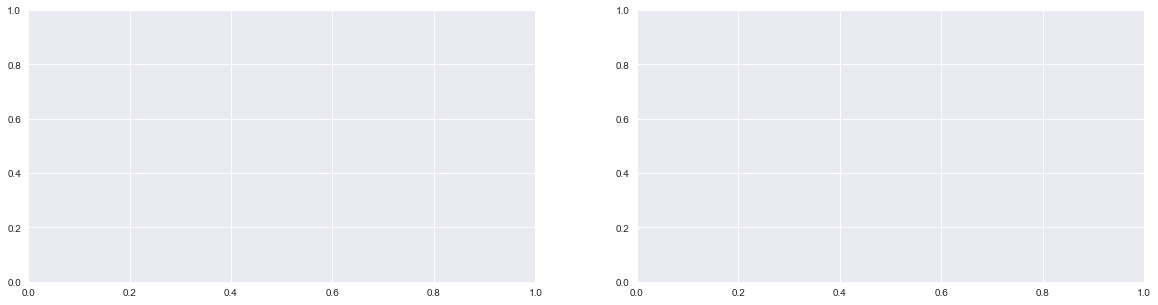

In [156]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(train_df['Speed(m/s)'], fit=norm, ax=ax[1])
train_df['Speed(m/s)'].plot.hist(ax=ax[0])

Our data now looks better than it was ,it is now free of outliers

### Varibale Encoding

#### Dropping unneccesary columns

In [157]:
# Dropping all the columns we will no longer need
train_columns_drop = ['User Id', 'Vehicle Type','Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','Arrival at Destination - Time',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time','Rider Id',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'No_Of_Orders',
       'Age', 'Average_Rating','Speed(m/s)']

test_columns_drop = ['User Id', 'Vehicle Type',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month','Rider Id',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'No_Of_Orders',
       'Age', 'Average_Rating']
train_df=train_df.drop(train_columns_drop, axis=1) 
test_df=test_df.drop(test_columns_drop, axis=1)

KeyError: "['Speed(m/s)'] not found in axis"

In [158]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21201 entries, Order_No_4211 to Order_No_15578
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   User Id                                    21201 non-null  object 
 1   Vehicle Type                               21201 non-null  object 
 2   Platform Type                              21201 non-null  int64  
 3   Personal or Business                       21201 non-null  object 
 4   Placement - Day of Month                   21201 non-null  int64  
 5   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 6   Placement - Time                           21201 non-null  object 
 7   Confirmation - Day of Month                21201 non-null  int64  
 8   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 9   Confirmation - Time                        21201 non-null  object 
 10  Arriva

In [159]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7068 entries, Order_No_19248 to Order_No_21633
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   User Id                               7068 non-null   object 
 1   Vehicle Type                          7068 non-null   object 
 2   Platform Type                         7068 non-null   int64  
 3   Personal or Business                  7068 non-null   object 
 4   Placement - Day of Month              7068 non-null   int64  
 5   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 6   Placement - Time                      7068 non-null   object 
 7   Confirmation - Day of Month           7068 non-null   int64  
 8   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 9   Confirmation - Time                   7068 non-null   object 
 10  Arrival at Pickup - Day of Month      7068 non-null   int64  
 11 

#### Changing DataTypes

In [160]:
train_df['Platform Type'] = train_df['Platform Type'].astype('category')

test_df['Platform Type'] = test_df['Platform Type'].astype('category')
test_df['Personal or Business']=test_df['Personal or Business'].astype('category')
train_df['Personal or Business']=train_df['Personal or Business'].astype('category')

### Feature Correlation to the Target Feature

To be honest, we can’t quite be sure which features will be “irrelevant” when we haven’t run any models (and seen their results) yet. This is especially true when combination of features, not individual features, may be the key to finding the right categorization scheme.
Let’s see if there are “completely uncorrelated” features that, when deleted, might not affect the other features. This still doesn’t guarantee that the feature is useless when combined with other features, but could direct us to a few hopefuls.
As in, let’s draw some correlation heatmaps!

In [163]:
# Target variable
y_train = train_df['Time from Pickup to Arrival']
#Predictors
X_train = train_df.drop('Time from Pickup to Arrival', axis=1) 
X_test = test_df
X_test_order_no = test_df.index

In [164]:
y_train

Order No
Order_No_4211      745
Order_No_27440    2886
Order_No_14170    2615
Order_No_21727    2986
Order_No_8301     1602
                  ... 
Order_No_27103     919
Order_No_3786     2331
Order_No_7281     2418
Order_No_15575     717
Order_No_15578    1647
Name: Time from Pickup to Arrival, Length: 21201, dtype: int64

In [165]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21201 entries, Order_No_4211 to Order_No_15578
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   User Id                                    21201 non-null  object  
 1   Vehicle Type                               21201 non-null  object  
 2   Platform Type                              21201 non-null  category
 3   Personal or Business                       21201 non-null  category
 4   Placement - Day of Month                   21201 non-null  int64   
 5   Placement - Weekday (Mo = 1)               21201 non-null  int64   
 6   Placement - Time                           21201 non-null  object  
 7   Confirmation - Day of Month                21201 non-null  int64   
 8   Confirmation - Weekday (Mo = 1)            21201 non-null  int64   
 9   Confirmation - Time                        21201 non-null  object  

In [130]:
#Feature Encoding look at dummy coding 

oce = ce.OneHotEncoder(['Platform Type', 'Personal or Business','hour_status', 'week_no'])


X_train = oce.fit_transform(X_train,y_train)

X_test = oce.transform(X_test)



In [131]:
X_train

,Platform Type_1,Platform Type_2,Platform Type_3,Platform Type_4,Personal or Business_1,Personal or Business_2,Distance (KM),Temperature,Rider Id_1,Rider Id_2,...,week_no_2,week_no_3,week_no_4,pickuphour,hour_status_1,hour_status_2,hour_status_3,hour_status_4,hour_status_5,hour_status_6
Order No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,1,0,0,0,1,0,4,20.400000,1,0,...,0,0,0,10,1,0,0,0,0,0
Order_No_27440,1,0,0,0,0,1,20,24.500000,1,0,...,1,0,0,16,0,1,0,0,0,0
Order_No_21727,1,0,0,0,0,1,18,15.200000,1,0,...,0,1,0,7,0,0,1,0,0,0
Order_No_8301,0,1,0,0,0,1,7,19.200000,1,0,...,1,0,0,10,1,0,0,0,0,0
Order_No_10440,1,0,0,0,1,0,26,23.258889,1,0,...,0,0,1,12,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Order_No_6655,1,0,0,0,1,0,16,22.100000,0,0,...,0,0,0,13,0,0,0,1,0,0
Order_No_7344,1,0,0,0,1,0,9,30.700000,0,0,...,0,0,0,14,0,0,0,1,0,0
Order_No_14073,1,0,0,0,1,0,17,21.300000,0,0,...,1,0,0,9,0,0,1,0,0,0


In [127]:
X_data = X_train
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled)


# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.05)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
904,904,0.234792
907,907,0.229051
902,902,0.198651
900,900,0.186584
899,899,0.185653
...,...,...
871,871,0.000061
872,872,0.000061
499,499,0.000061
874,874,0.000061


KeyboardInterrupt: 

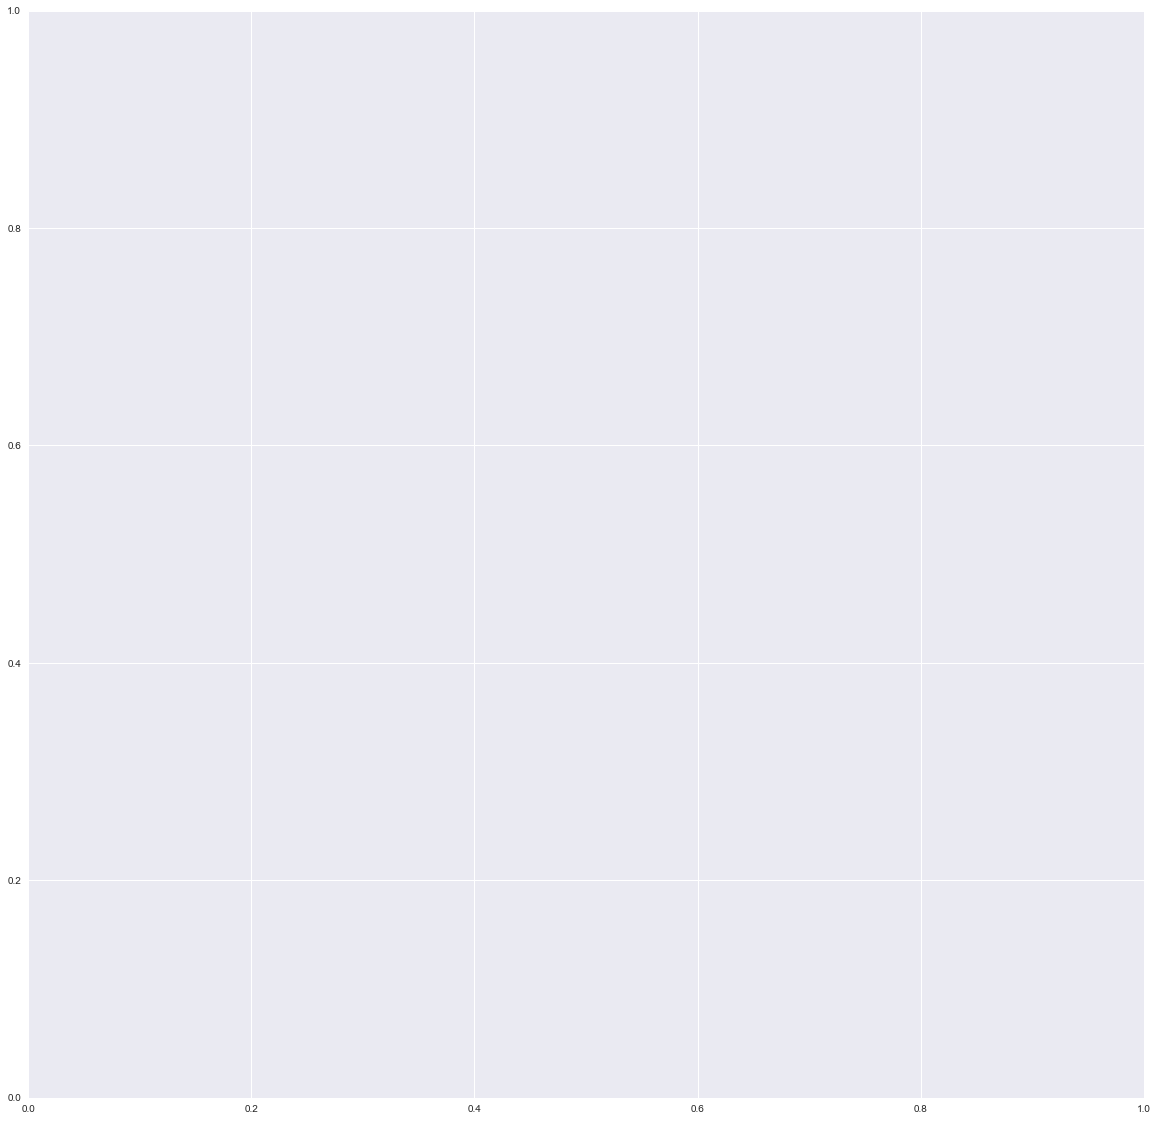

In [128]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X_normalize.corr(), annot=True, cbar=False)

## Implementation 

### choose models

In [ ]:
# import train/test split module
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=0)

In [ ]:
Random Forest 

In [ ]:
Mutliple Regression
# import regression module
from sklearn.linear_model import LinearRegression

# split predictors and response
X = df_updated2.drop(['Time_from_Pickup_to_Arrival'], axis=1)
y = df_updated2['Time_from_Pickup_to_Arrival']

# create model object
lm = LinearRegression()

# import train/test split module
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

# train model
lm.fit(X_train, y_train)

###Assessing Model Accuracy

#Predict y
y_pred = lm.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse = sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Square Error:', rmse)


In [ ]:
XG Boost

In [ ]:
Lasso

In [ ]:
Ridge

# import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

# create ridge model
ridge = Ridge()

# train the model
ridge.fit(X_train, y_train)

test_ridge = ridge.predict(X_test)

print('Ridge :', metrics.mean_squared_error(y_test, test_ridge))






In [ ]:
Light GBM

In [ ]:
Ensemble MethodR

## Refinement 

## Model Evaluation and Validation

# <center>Conclusion</center>

## Reflection 

## Improvement 

## References 

In [ ]:
https://towardsdatascience.com/is-the-food-here-yet-f13a7bb0cd20

In [ ]:
https://towardsdatascience.com/data-preprocessing-and-eda-for-data-science-50ba6ea65c0a

In [ ]:
https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd